# Data Science Nanodegree - Blog Post
Created By: Renan Vieira Dias

--- 

### Rubrics for the Work
https://review.udacity.com/#!/rubrics/1507/view

### Titles For The Article

 - KeyWords:
    - Data
    - Job
    - Work
    - Employ
    - Skills
    - Language
    - Salary
    - Experience
    - Seniority
  
  
 - Brain Storm:
    - Requirements for Data Jobs
    - Data Jobs tools
    - What Data tells about Data Jobs
    - How much each skill is worth it on data



## Questions
  
- Which skills does each data job require?
    - ['LanguageWorkedWith']
    - ['LanguageDesireNextYear']
    - ['DatabaseWorkedWith']
    - ['DatabaseDesireNextYear']
    - ['PlatformWorkedWith']
    - ['PlatformDesireNextYear']
    - ['WebFrameWorkedWith']
    - ['WebFrameDesireNextYear']
    - ['MiscTechWorkedWith']
    - ['MiscTechDesireNextYear']
    - ['DevEnviron']
    - ['OpSys']
  
  
- How long you have to be in the field to get to be senior? (Or equivalent money)
    - ['YearsCodePro']
    - ['CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs']
        - alazar: the salary is different for each profession. (0-25%,26-50%,75%,)

  
- What are some variables that influence your salary per hours?
    - ['EdLevel']
    - ALL of the above ( Explain better this part)
        - alazar: for each of the profession or hole group?? sugestion: only the data professions

## Segment
- ['Country'] = ????? 
    - (Sugestions: Top countries by volume of type)
- ['Employment'] = ['Employed full-time','Employed part-time']
- ['devtype_interest'] = ['Data or business analyst','Data scientist or machine learning specialist','Database administrator','Engineer, data']

### Imports

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

### Functions

In [2]:
def optionIsInCell(cell, option):
    if str(cell).find(option)!=-1:
        return 1
    return 0

In [3]:
def transformingColumnByOptions(df, column, options, prefix = False, separator='_'):
    for each in options:
        new_column = column + separator + each if prefix else each
        df[new_column] = df[column].apply(optionIsInCell, option = each)
    return df

In [4]:
def isOneOfTheList(x, list_options):
    for each in list_options:
        if each in x:
            return True
    return False

In [5]:
def getOptionOfMultipleSelection(df, column, separator = ';'):
    flat_list = []
    for sublist in df[column].dropna().str.split(pat=separator, expand=False):
        for item in sublist:
            if item not in flat_list:
                flat_list.append(item)
    return flat_list

### Reading Data Files

In [6]:
df = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

### Collecting Columns Options & Decoding

In [7]:
columnsOptions = {}
columnsToGetOptions =[
        'DevType'
        ,'EdLevel'
        ,'LanguageWorkedWith'
        ,'LanguageDesireNextYear'
        ,'DatabaseWorkedWith'
        ,'DatabaseDesireNextYear'
        ,'PlatformWorkedWith'
        ,'PlatformDesireNextYear'
        ,'WebFrameWorkedWith'
        ,'WebFrameDesireNextYear'
        ,'MiscTechWorkedWith'
        ,'MiscTechDesireNextYear'
        ,'DevEnviron'
        ,'OpSys'
    ]
for each in columnsToGetOptions:
    tempList = getOptionOfMultipleSelection(df,each)
    tempList.sort()
    columnsOptions[each] = tempList

In [8]:
# Creating each skill columns
for questionColumn in columnsToGetOptions:
    df = transformingColumnByOptions(df, questionColumn, columnsOptions[questionColumn], separator='_')

### Checking the Employment
- Columns: Employment
- Question: Which of the following best describes your current employment status?
- Interest In the following DevTypes:
    - 'Employed full-time'
    - 'Employed part-time'

In [9]:
# Get only employed surveys
df = df[ df['Employment'].isin(['Employed full-time','Employed part-time']) ]

### Checking Every Work Title
- Columns: DevType
- Question: Which of the following describe you? Please select all that apply.
- Interest In the following DevTypes:
    - 'Data or business analyst'
    - 'Data scientist or machine learning specialist'
    - 'Database administrator'
    - 'Engineer, data'


In [10]:
devtype_interest = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
]

# Getting a list of the other jobs
devtype_not_interest = []
for each in columnsOptions['DevType']:
    if not each in devtype_interest:
        devtype_not_interest.append(each)

In [11]:
# Clearing those with no interest on data DevType
df = df.dropna(subset = ['DevType']).copy()
# df['datajobs'] = df['DevType'].apply( isOneOfTheList, list_options = devtype_interest)
# df = df[df['datajobs']]
# df = df.drop(['datajobs'], axis=1)

In [26]:
dataJobsOutputs = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
    ,'Data Misture'
    ,'Data Partialy'
    ,'Not Data'
]

# Creating the data jobs Categories
def dataJobsClassificationMicro(DevType):
    for interest in devtype_interest:
        if interest == DevType:
            return interest
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'Data Misture'
    return 'Not Data'

def dataJobsClassificationMacro(DevType):
    for interest in devtype_interest:
        if interest == DevType:
            return 'DataJob'
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'DataJob'
    return 'Not Data'

In [13]:
df['datajobsCategoryMicro'] = df['DevType'].apply( dataJobsClassificationMicro )
df['datajobsCategoryMacro'] = df['DevType'].apply( dataJobsClassificationMacro )

In [14]:
df[['DevType','datajobsCategoryMicro']].head(5)

,DevType,datajobsCategoryMicro
2,"Designer;Developer, back-end;Developer, front-...",Not Data
3,"Developer, full-stack",Not Data
4,"Academic researcher;Developer, desktop or ente...",Not Data
5,Data or business analyst;Data scientist or mac...,Data Misture
8,"Database administrator;Developer, back-end;Dev...",Data Partialy


In [16]:
df['datajobsCategoryMicro'].value_counts()

Not Data                                         51562
Data Partialy                                    14268
Data Misture                                       524
Data scientist or machine learning specialist      485
Data or business analyst                           378
Engineer, data                                     261
Database administrator                              84
Name: datajobsCategoryMicro, dtype: int64

### Understanding Job Skills

question. 


### Plotting Each Interest

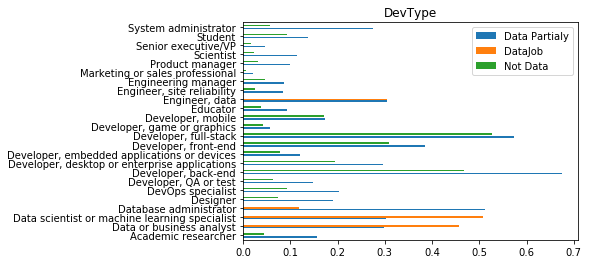

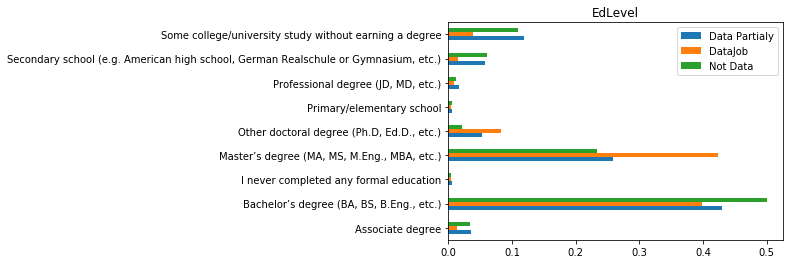

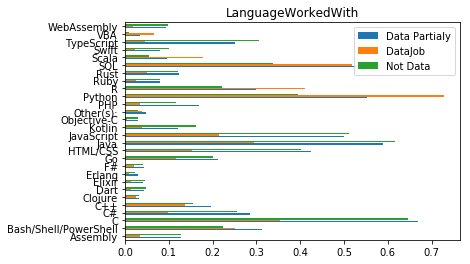

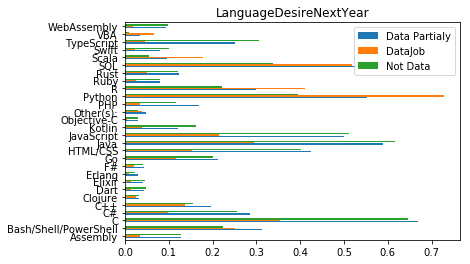

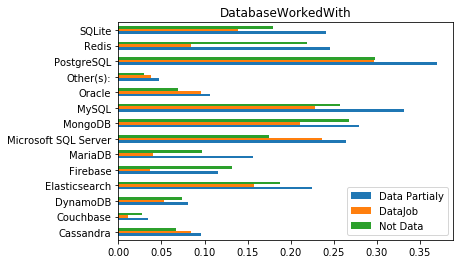

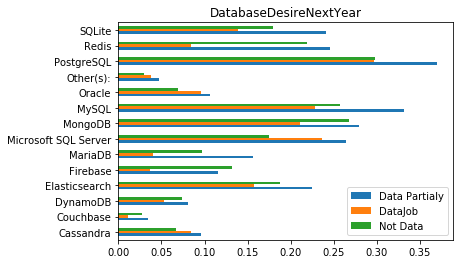

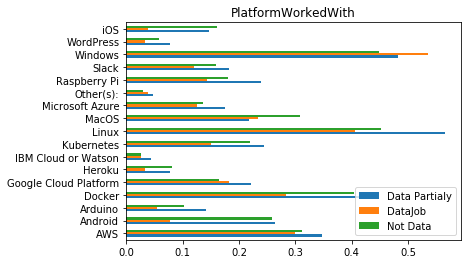

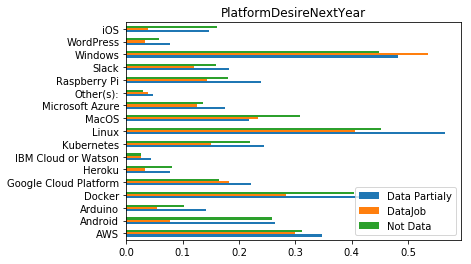

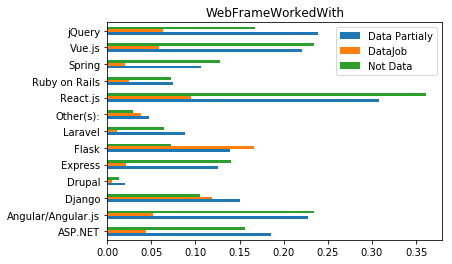

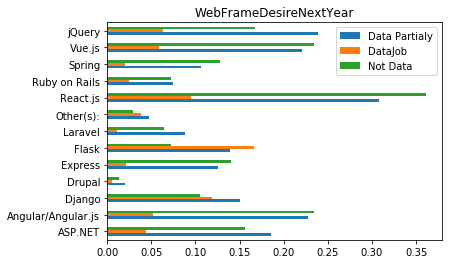

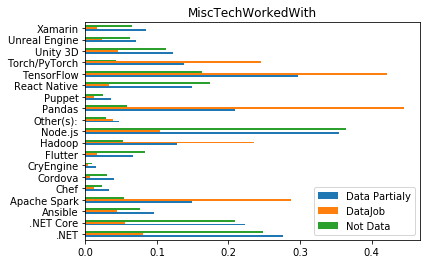

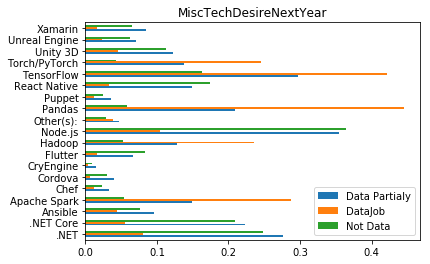

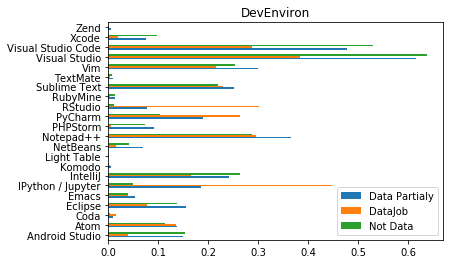

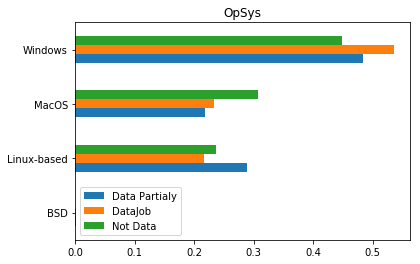

In [23]:
groupedResults = df.groupby(['datajobsCategoryMacro']).mean()
for skill in columnsOptions:
        groupedResults.reset_index()[columnsOptions[skill]].transpose().plot.barh()
        plt.legend(groupedResults.index)
        plt.title(skill)
        plt.show()


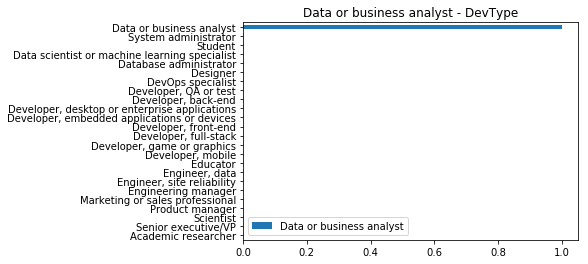

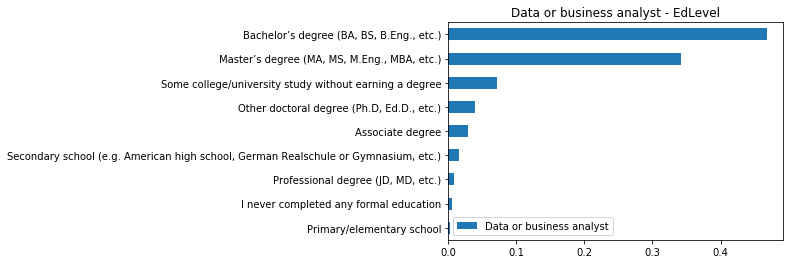

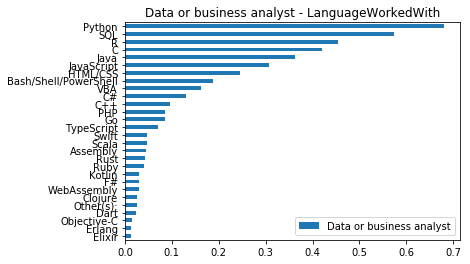

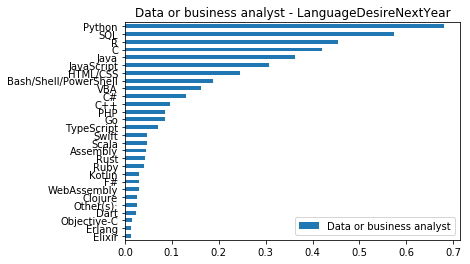

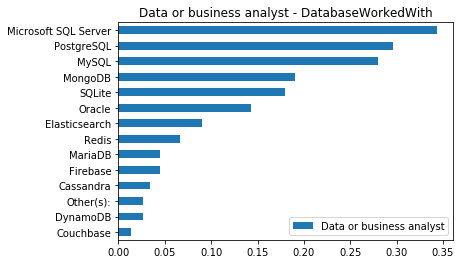

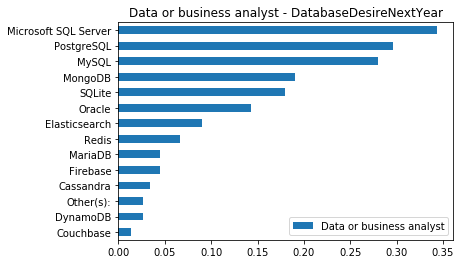

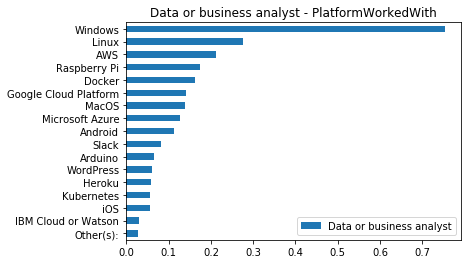

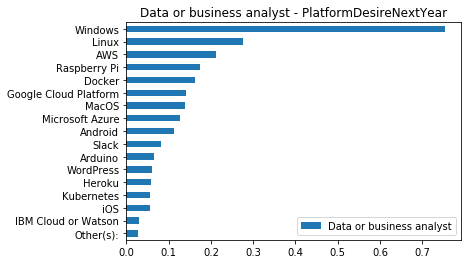

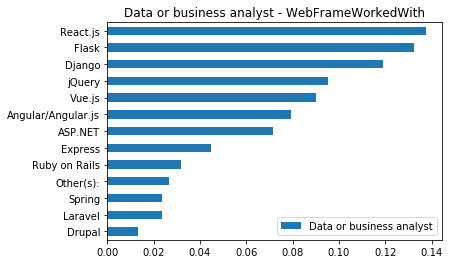

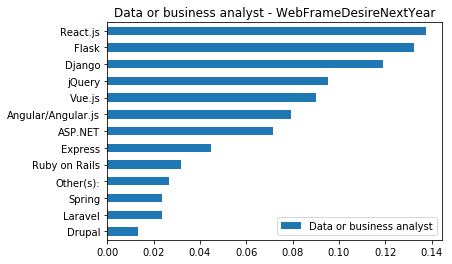

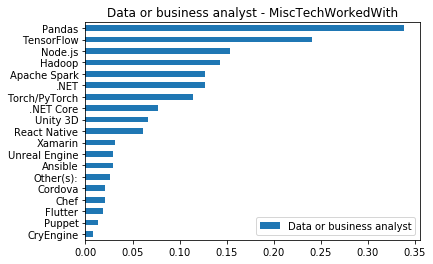

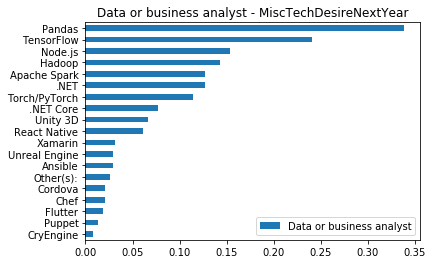

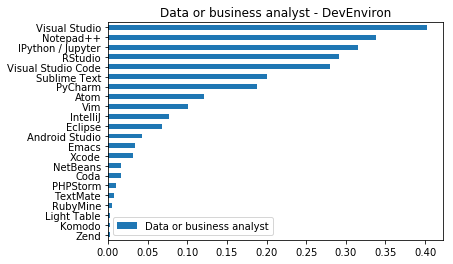

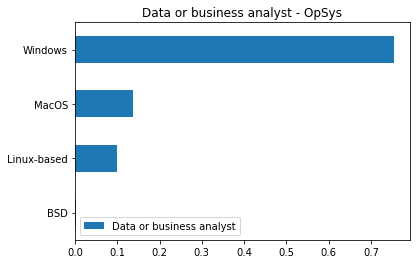

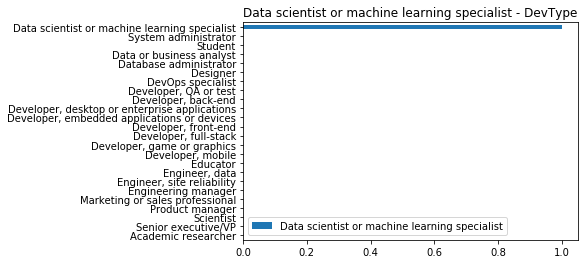

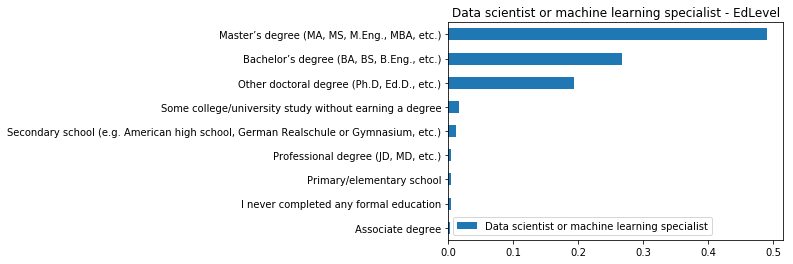

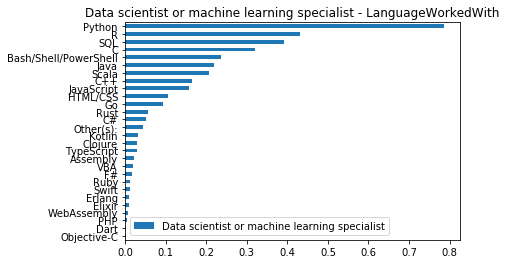

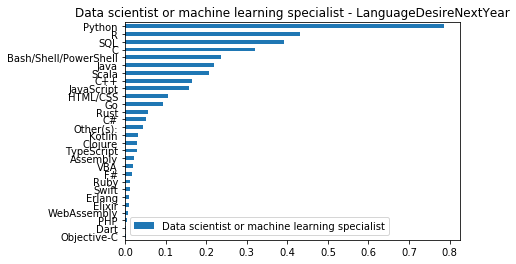

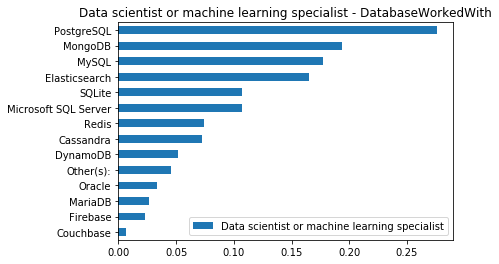

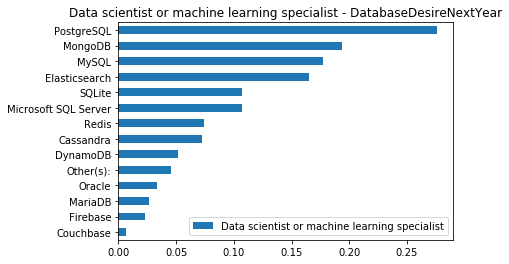

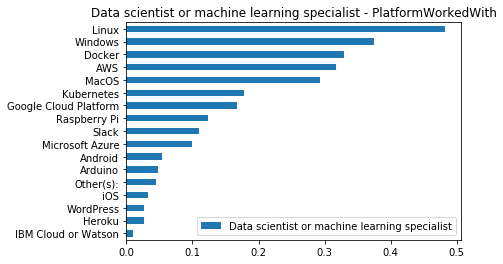

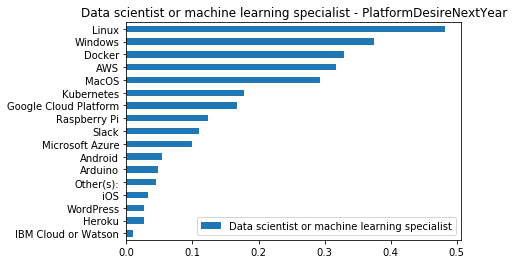

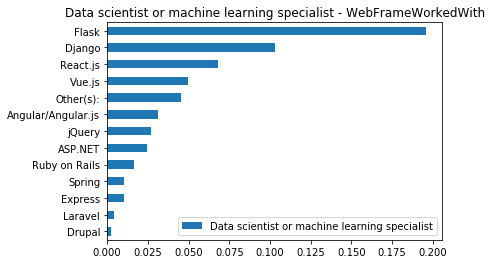

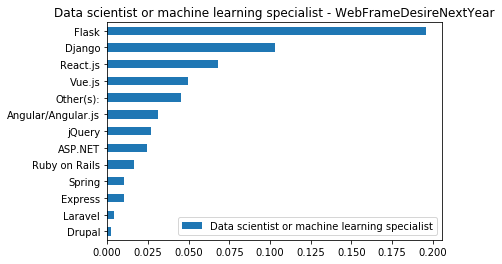

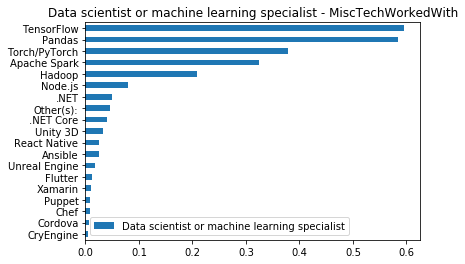

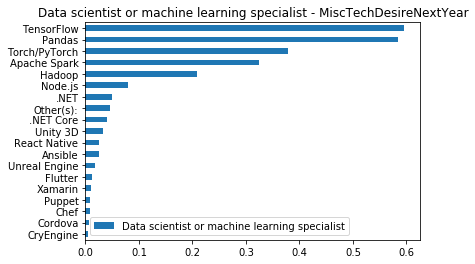

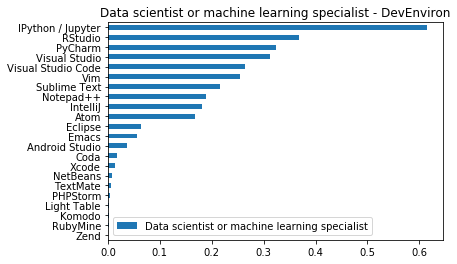

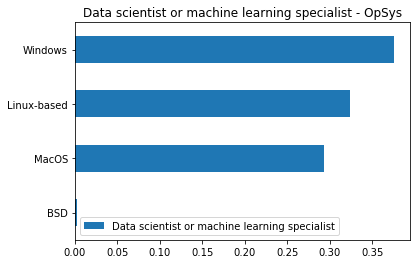

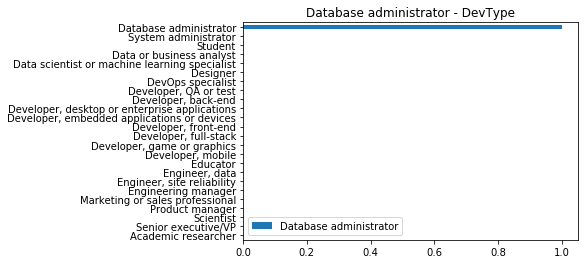

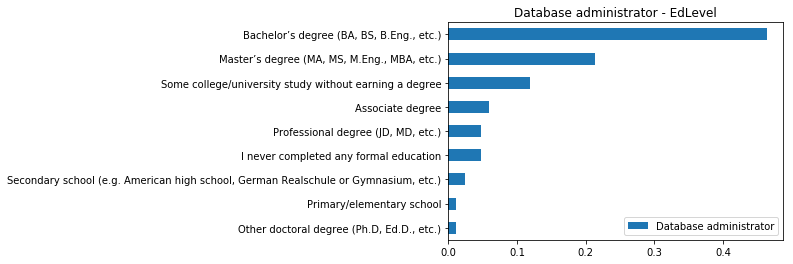

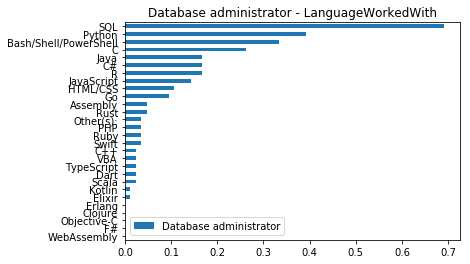

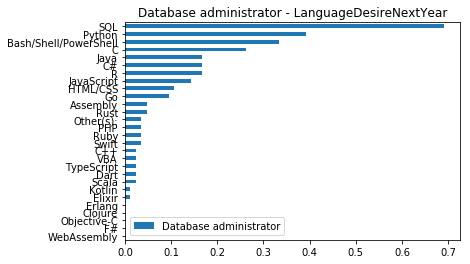

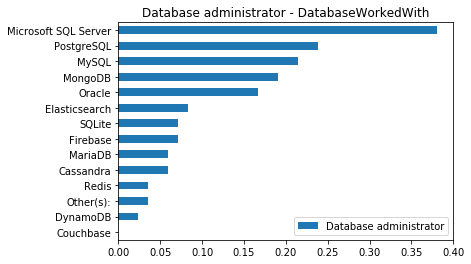

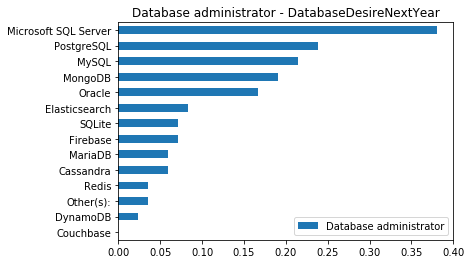

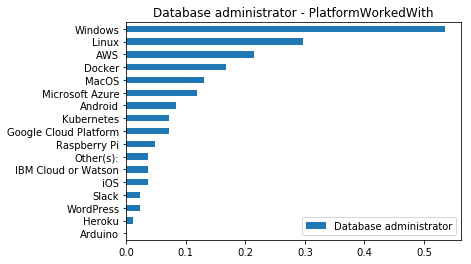

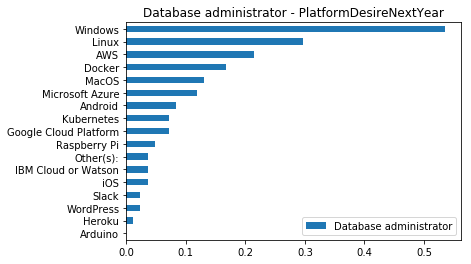

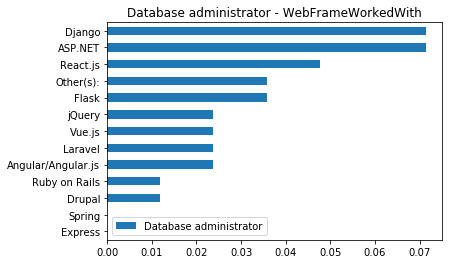

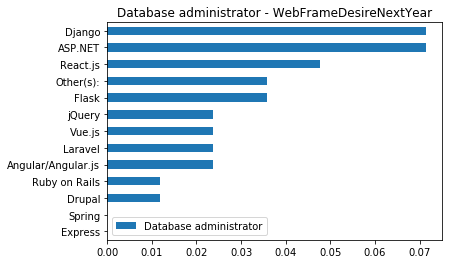

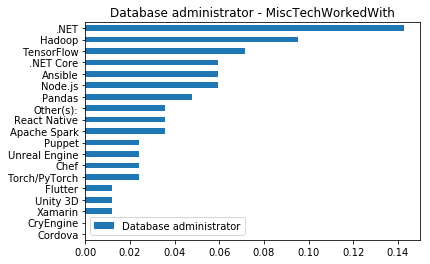

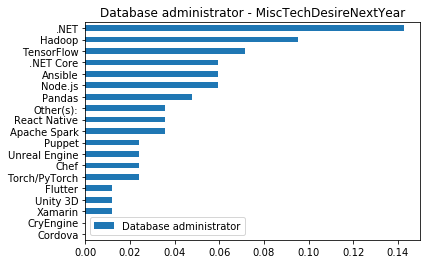

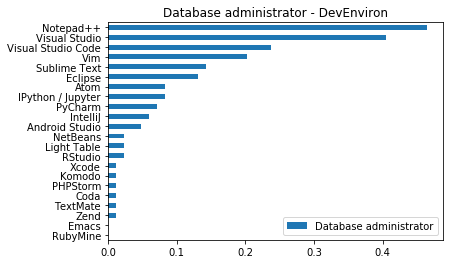

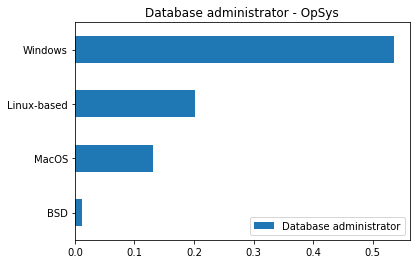

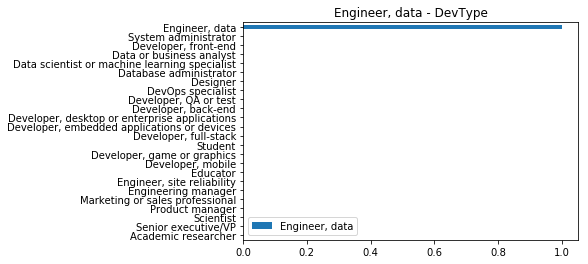

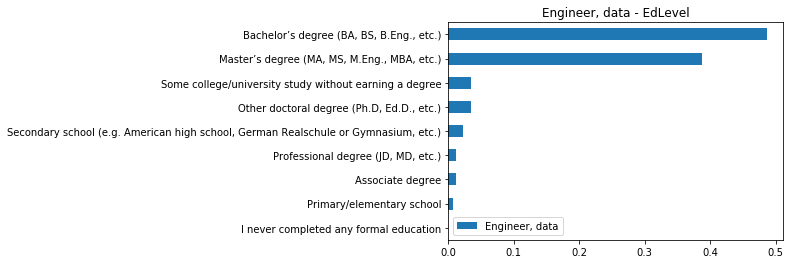

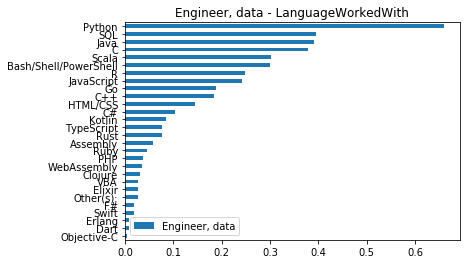

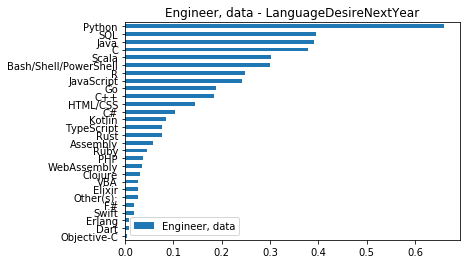

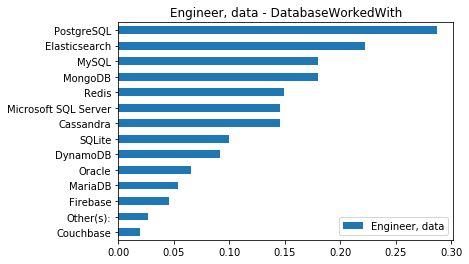

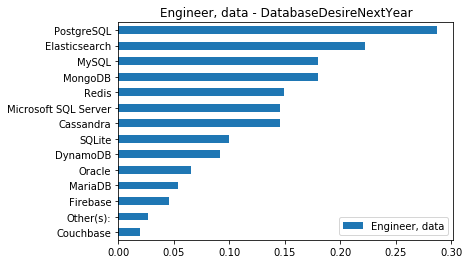

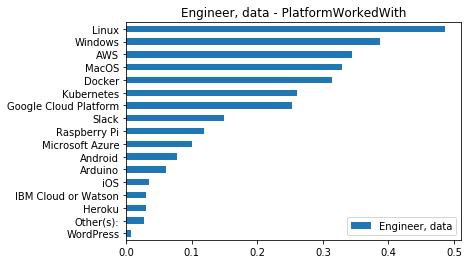

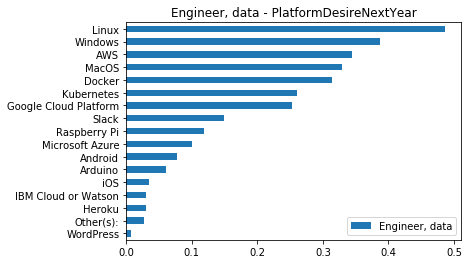

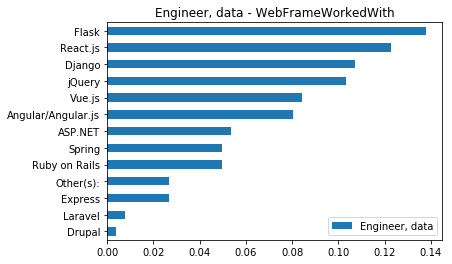

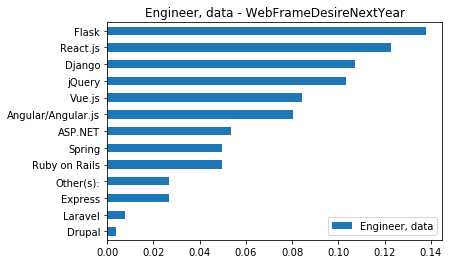

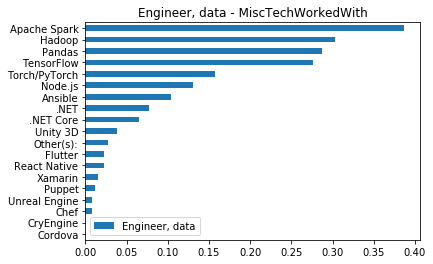

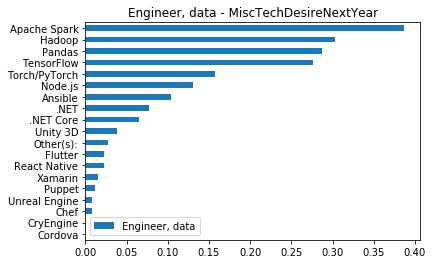

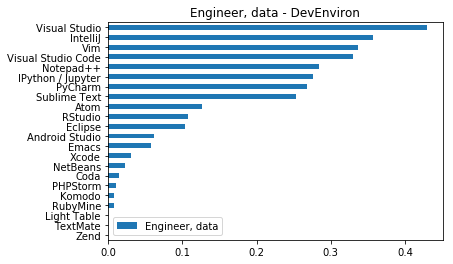

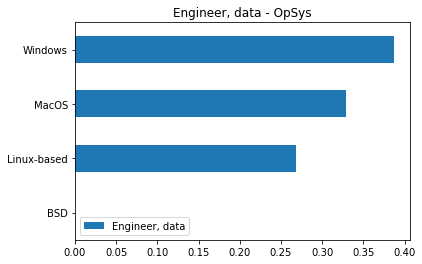

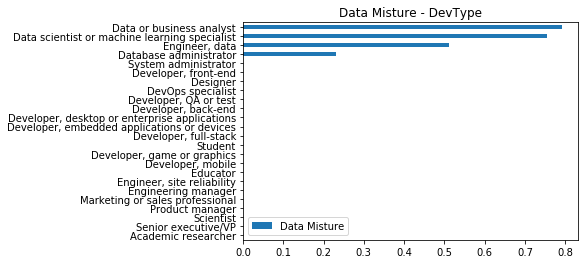

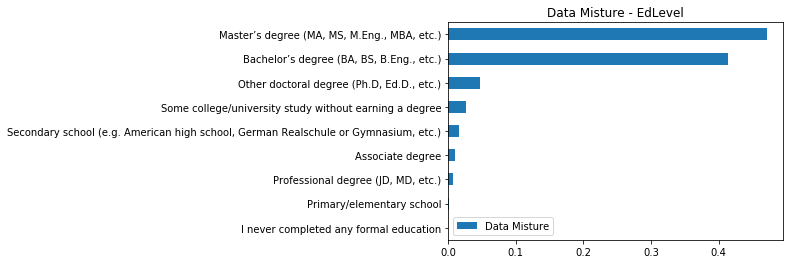

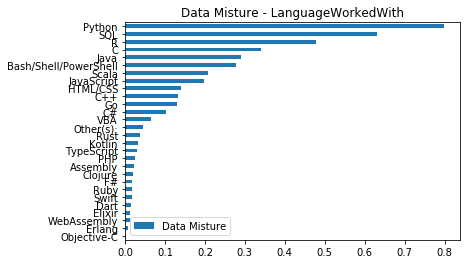

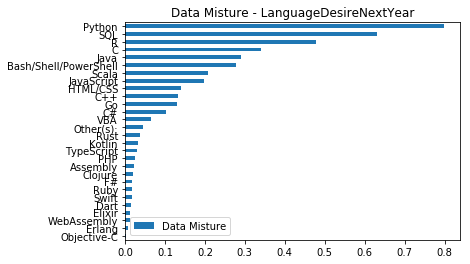

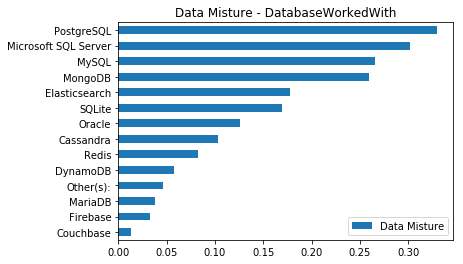

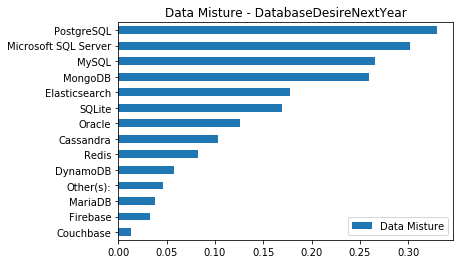

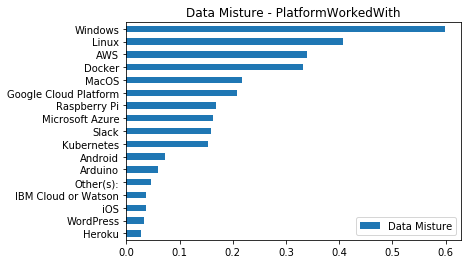

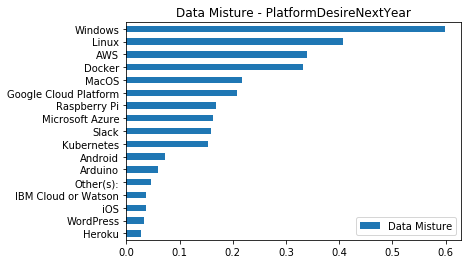

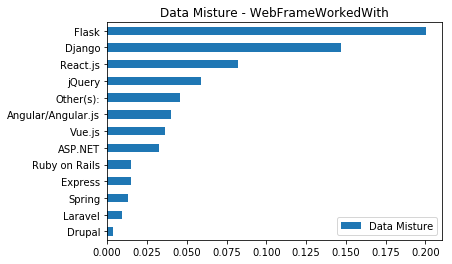

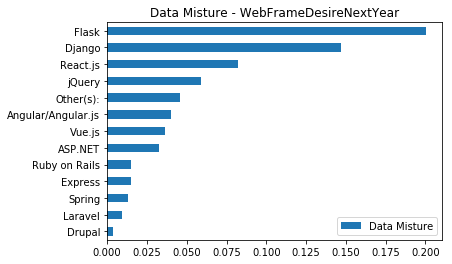

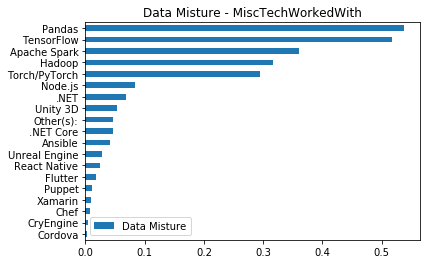

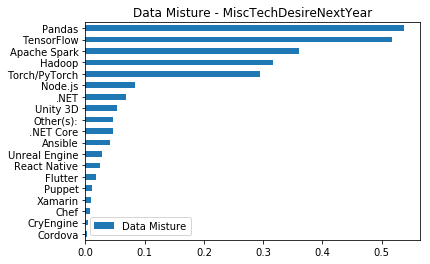

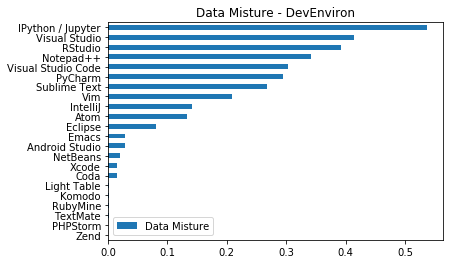

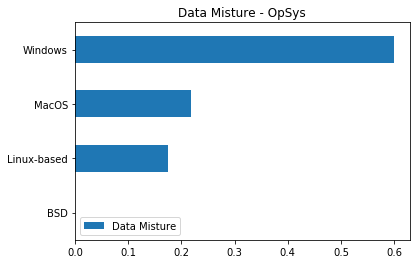

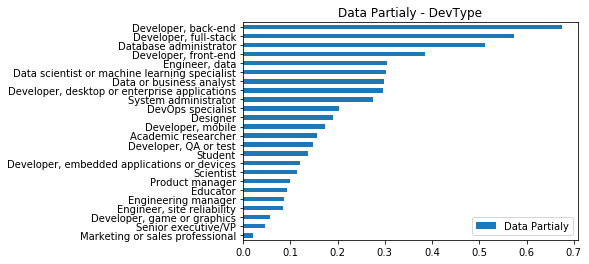

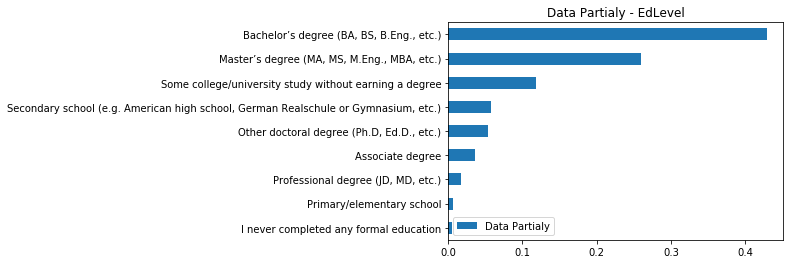

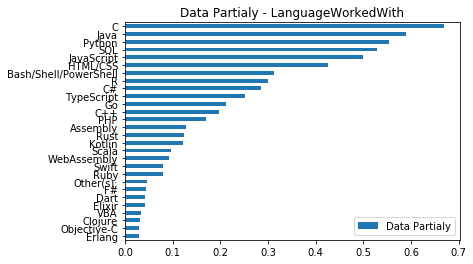

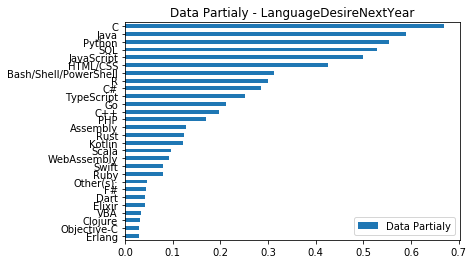

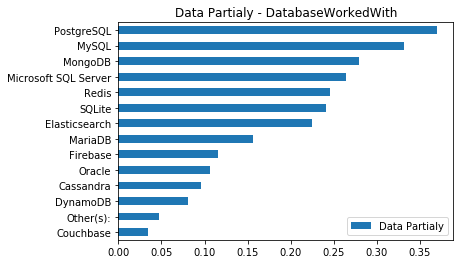

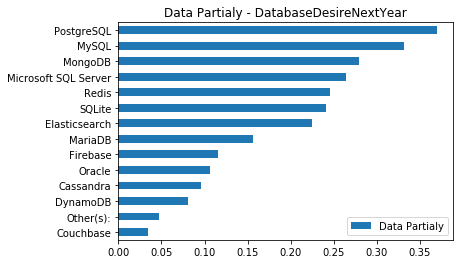

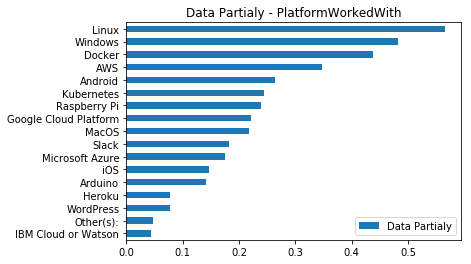

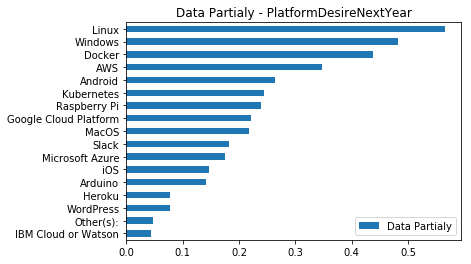

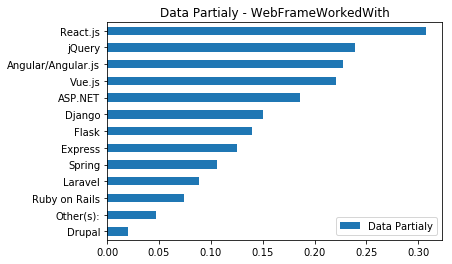

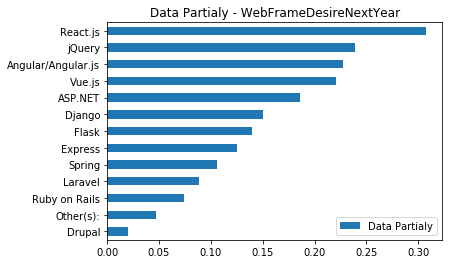

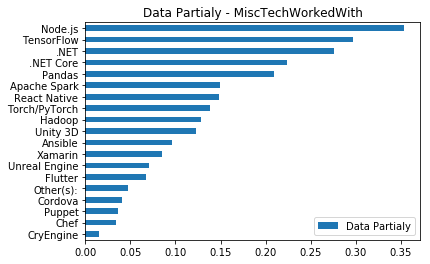

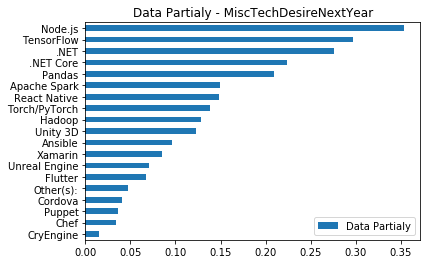

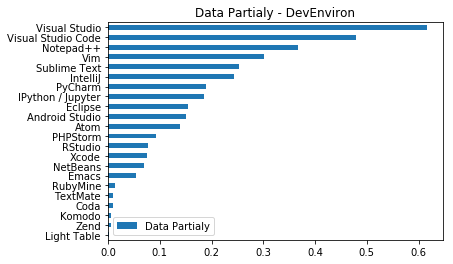

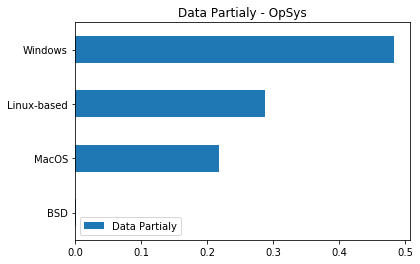

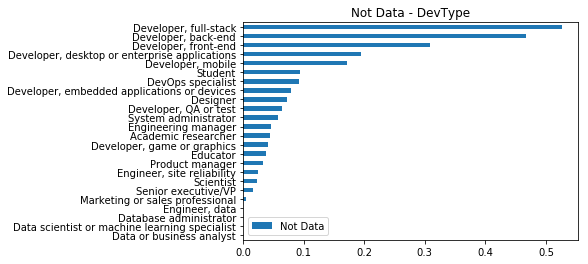

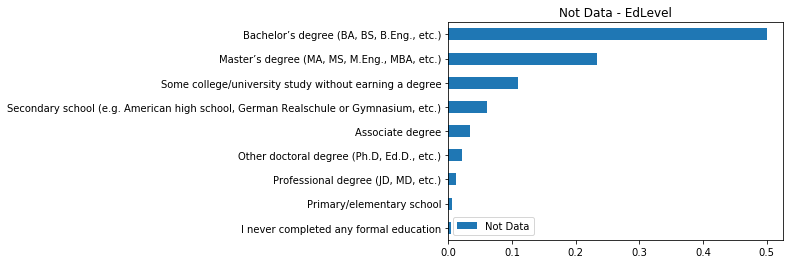

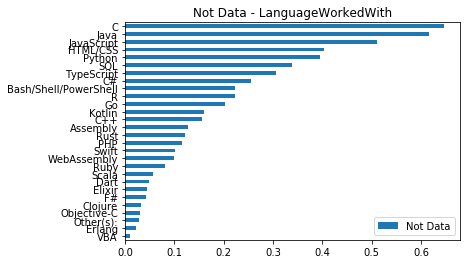

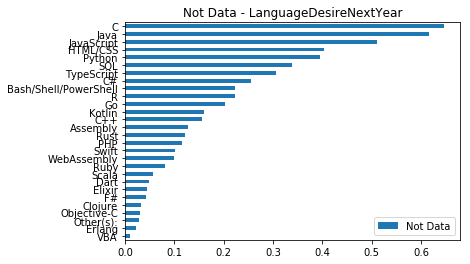

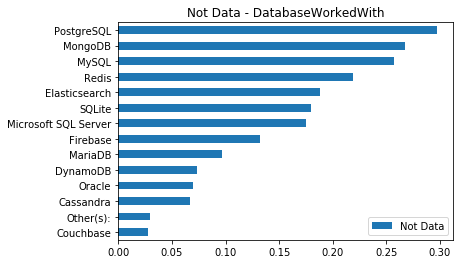

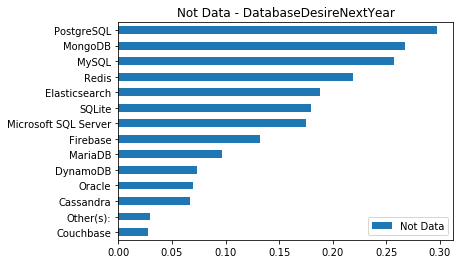

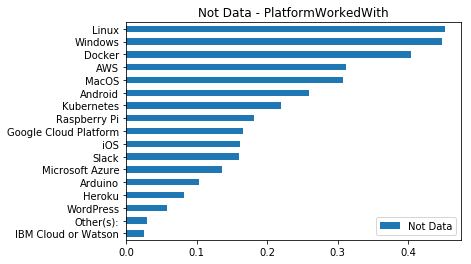

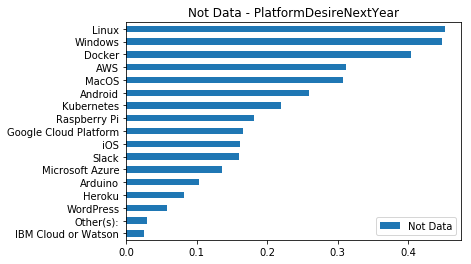

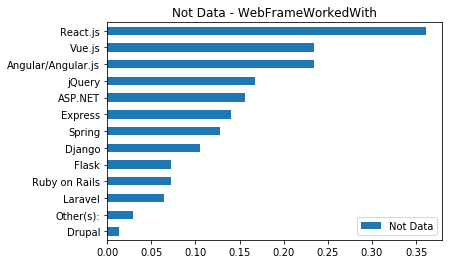

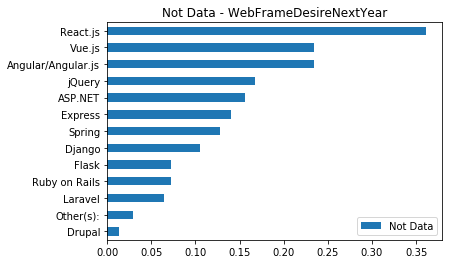

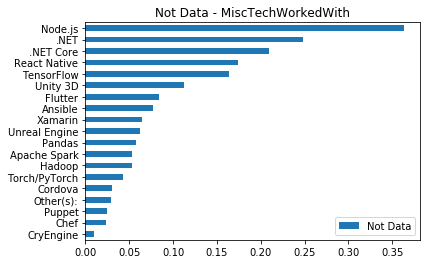

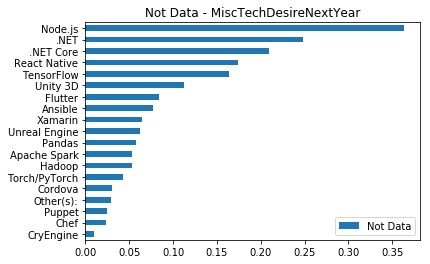

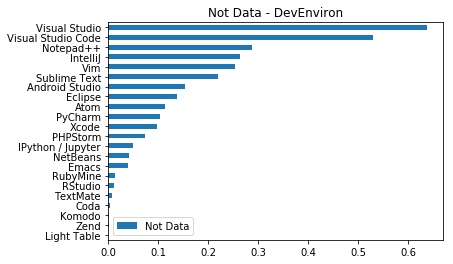

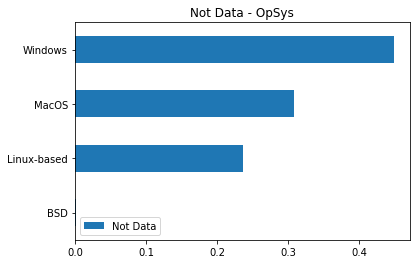

In [35]:
# .sort_values('Speed')
for eachOutput in dataJobsOutputs:
    groupedResults = df[df['datajobsCategoryMicro']==eachOutput].groupby(['datajobsCategoryMicro']).mean()
    for skill in columnsOptions:
            groupedResults.reset_index()[columnsOptions[skill]].transpose().sort_values(0,ascending=True).plot.barh()
            plt.legend(groupedResults.index)
            plt.title(eachOutput + ' - ' + skill)
            plt.show()


In [19]:
# Checking the distribution of 'Data Misture'
groupedResults.reset_index()[groupedResults.reset_index()['datajobsCategoryMicro']=='Data Misture'][devtype_interest].transpose()

,0
Data or business analyst,0.791985
Data scientist or machine learning specialist,0.755725
Database administrator,0.230916
"Engineer, data",0.511450


(Review) C


Sugestion: DATA RELATED AREA (GROUP FIRST?)

### Calculating Equivalent Salary
  
  
To calculate the seniority of a salary?
 - By Country
 - By Job Profession
 - At least 100
 - Histogram with quarter?
     - Junior 0-25%
     - Pleno 26-50%
     - Senior 51-75%
     - Specialist 100%

In [37]:
weeksInYear = 52
df['DollarPerHour'] = df['ConvertedComp']/df['WorkWeekHrs']/weeksInYear
df[['Country','CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs','DollarPerHour']]

,Country,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,DollarPerHour
2,Thailand,THB,Thai baht,23000.0,Monthly,8820.0,40.0,4.240385
3,United States,USD,United States dollar,61000.0,Yearly,61000.0,80.0,14.663462
4,Ukraine,UAH,Ukrainian hryvnia,NaN,NaN,NaN,55.0,NaN
5,Canada,CAD,Canadian dollar,40000.0,Monthly,366420.0,15.0,469.769231
8,New Zealand,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,57.198918
9,India,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,3.651923
11,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,United States,USD,United States dollar,90000.0,Yearly,90000.0,40.0,43.269231
13,Germany,EUR,European Euro,4150.0,Monthly,57060.0,40.0,27.432692
15,United Kingdom,GBP,Pound sterling,29000.0,Monthly,455352.0,40.0,218.919231


### Years of code

In [20]:
df['YearsCodePro'].head(50)

2                    1
3     Less than 1 year
4                    9
5                    3
8                    4
9                   10
11                 NaN
12                   8
13                   2
15                   3
16                   2
17                   3
18                  13
19                   4
21                  18
22                   1
23                   1
24                   1
25                   8
27                   5
28                   2
29                   3
31                   2
32                   3
34                  14
35    Less than 1 year
36                 NaN
37                  22
38                  23
40                   1
41                   5
42                   2
43                  19
44                  35
46                  20
48                   8
49                   2
50                 NaN
51                   1
52                   3
53                  10
55                  10
57                  23
59         

In [21]:
df['Country'].value_counts()

United States                            17181
India                                     6645
Germany                                   4767
United Kingdom                            4467
Canada                                    2593
France                                    1839
Brazil                                    1570
Australia                                 1491
Netherlands                               1406
Poland                                    1350
Spain                                     1326
Russian Federation                        1311
Italy                                     1091
Sweden                                     989
Switzerland                                822
Israel                                     746
Turkey                                     667
Austria                                    625
Ukraine                                    624
Pakistan                                   592
Romania                                    547
Czech Republi